## Model Architecture

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
perf_df = pd.read_csv('vpose_perf.csv')

In [73]:
def plot_perf_df(perf_df, savefig=False):
    sns.set(rc={"figure.figsize":(15, 20)})
    sns.regplot(perf_df['trainable parameters'], perf_df['MPJPE on H36M'])
    for i in range(perf_df.shape[0]):
        plt.text(x=perf_df['trainable parameters'][i],y=perf_df['MPJPE on H36M'][i],
                 s='arc '+ perf_df['architecture'][i] + '; ' + 'ch ' + str(perf_df['channels'][i]), 
              fontdict=dict(color='black',size=12), va='bottom', ha='left')
    if savefig:
        plt.savefig('vpose_perf.png', bbox_inches='tight')
    plt.show()

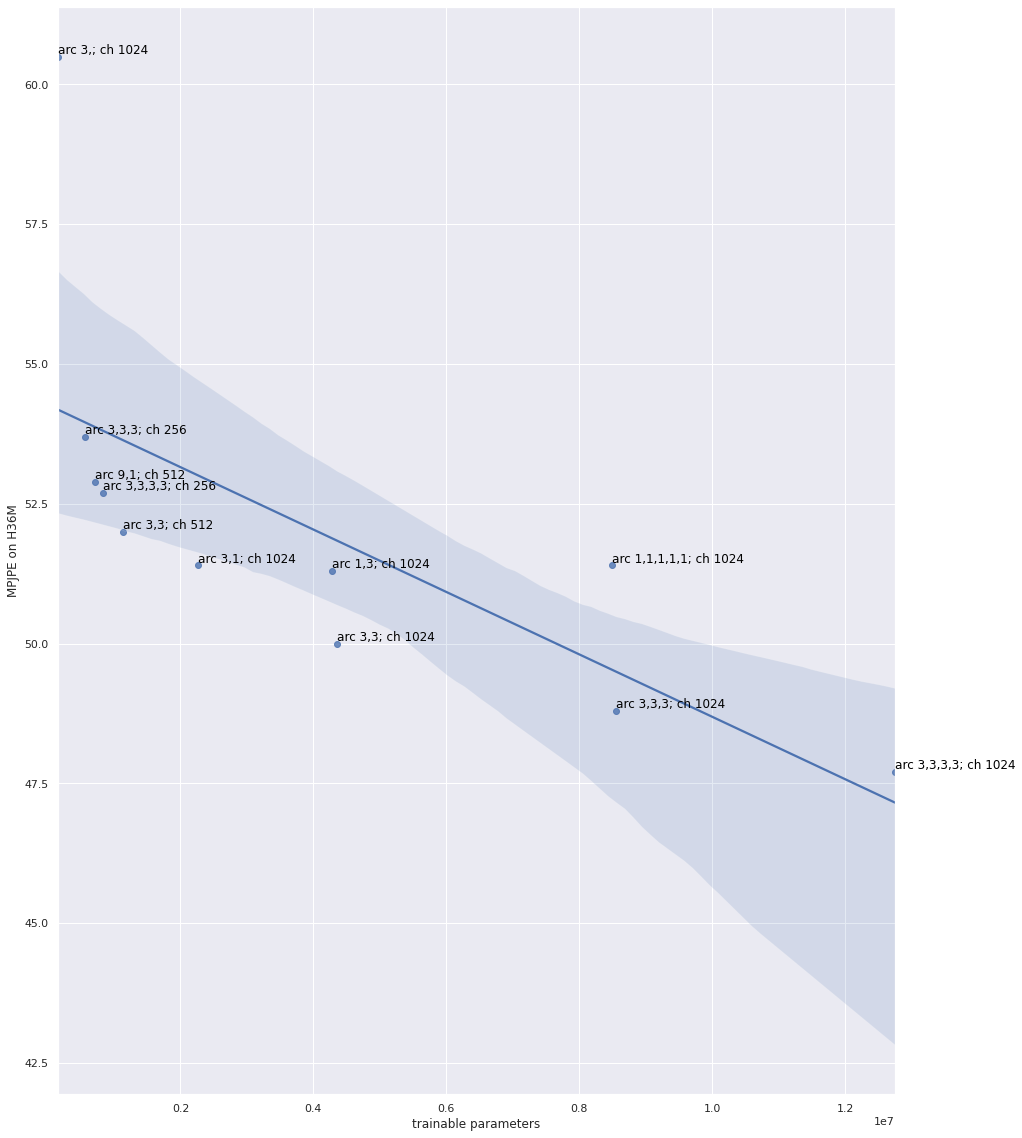

In [74]:
plot_perf_df(perf_df, savefig=True)

## Inference FPS

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
fps_df = pd.read_csv('vpose_report.csv')
fps_df

,receptive field,channels,architecture,trainable parameters,MPJPE on H36M (mm),FPS,trt FPS,avg time per frame (ms),trt avg time per frame (ms)
0,9,1024,"3,3",4357171,50.0,171.82,207.03,5.82,4.83
1,27,1024,"3,3,3",8555571,48.8,87.87,106.60,11.38,9.38
2,81,1024,"3,3,3,3",12753971,47.7,58.89,68.07,16.98,14.69
3,243,1024,"3,3,3,3,3",16952371,46.8,23.02,27.68,43.44,36.12


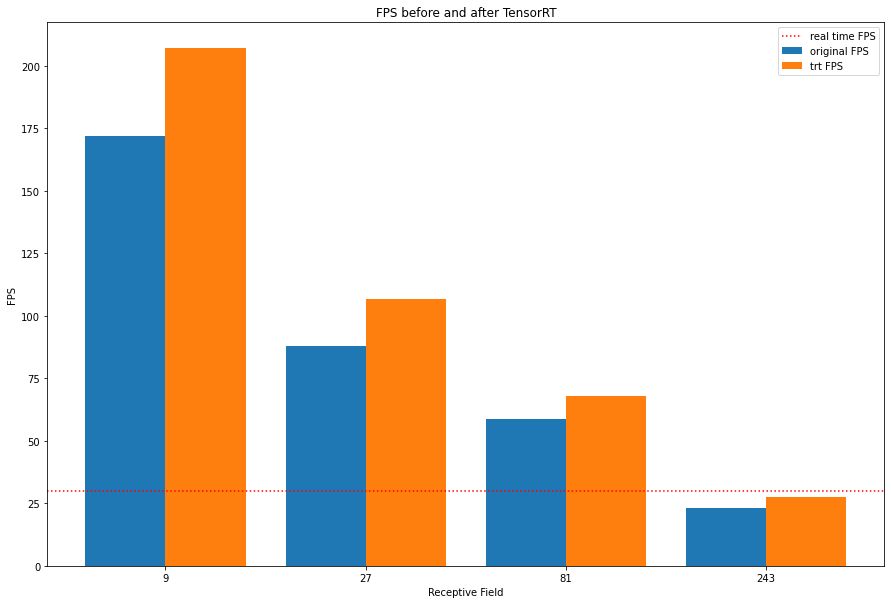

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.figure(figsize=(15, 10))

X = fps_df['receptive field']
Y_fps = fps_df['FPS']
Z_trt_fps = fps_df['trt FPS']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y_fps, 0.4, label = 'original FPS')
plt.bar(X_axis + 0.2, Z_trt_fps, 0.4, label = 'trt FPS')

plt.axhline(30, color='red', ls='dotted', label = 'real time FPS')

plt.xticks(X_axis, X)
plt.xlabel("Receptive Field")
plt.ylabel("FPS")
plt.title("FPS before and after TensorRT")
plt.legend()
plt.savefig('vpose_report.png', bbox_inches='tight')
plt.show()